In [ ]:
# !pip install seaborn

In [1]:
# import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import re
import seaborn as sb
%matplotlib inline

In [2]:
# Read in instagram data from kaggle of over 1000 users into pandas dataframe
user_df = pd.read_csv('../resources/Final_Data_Set_MBJ.csv')
user_df.info()
user_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          348 non-null    int64  
 1   author              348 non-null    object 
 2   total_followers     348 non-null    int64  
 3   total_following     348 non-null    int64  
 4   number_posts        348 non-null    int64  
 5   shortcode           348 non-null    object 
 6   timestamp           348 non-null    int64  
 7   Date                348 non-null    object 
 8   time                348 non-null    object 
 9   likes               348 non-null    int64  
 10  comments            348 non-null    int64  
 11  engagement          348 non-null    float64
 12  average_engagement  348 non-null    float64
 13  caption             246 non-null    object 
 14  text                345 non-null    object 
 15  Tag_1               58 non-null     object 
 16  Tag_2   

,Unnamed: 0,author,total_followers,total_following,number_posts,shortcode,timestamp,Date,time,likes,...,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9,Tag_10,Tag_11
0,0,shmee150,1581500,2857,10552,CSzoxcyrzj2,1629485286,8/20/2021,6:48 PM,19080,...,SF90,futureshmeemobile,AssettoFiorano,BannedAuto,LAcars,Shmee150,NaN,NaN,NaN,NaN
1,1,shmee150,1581500,2857,10552,CSr2jQPjy59,1629224075,8/17/2021,6:14 PM,22143,...,P1,McLarenP1,testdrive,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN
2,2,shmee150,1581500,2857,10552,CSpWzdxJIIV,1629140321,8/16/2021,6:58 PM,21606,...,300SL,PebbleBeach,CarWeek,testdrive,Shmee150,NaN,NaN,NaN,NaN,NaN
3,3,shmee150,1581500,2857,10552,CSkdxyJAk2n,1628976206,8/14/2021,9:23 PM,30069,...,Bolide,Quail,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN,NaN
4,4,shmee150,1581500,2857,10552,CSfHSEzi3BD,1628796639,8/12/2021,7:30 PM,34073,...,Valkyrie,ValkyrieSpider,firstlook,PebbleBeach,CarWeek,Shmee150,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,simeonpanda,7872317,187,7465,CSZ8acRJ4jt,1628623169,8/10/2021,7:19 PM,78662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,344,simeonpanda,7872317,187,7465,CSZZfp2Hs0r,1628604861,8/10/2021,2:14 PM,26263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,345,simeonpanda,7872317,187,7465,CSYTSCEgCC7,1628568165,8/10/2021,4:02 AM,23835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,346,simeonpanda,7872317,187,7465,CSW4jvynJ3N,1628520524,8/9/2021,2:48 PM,33932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Plotting Likes relationship with
# Number of comments and Days since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = user_df, x = mem, y = 'likes' , color = 'green')
        pltNum += 1
    
    plt.show()

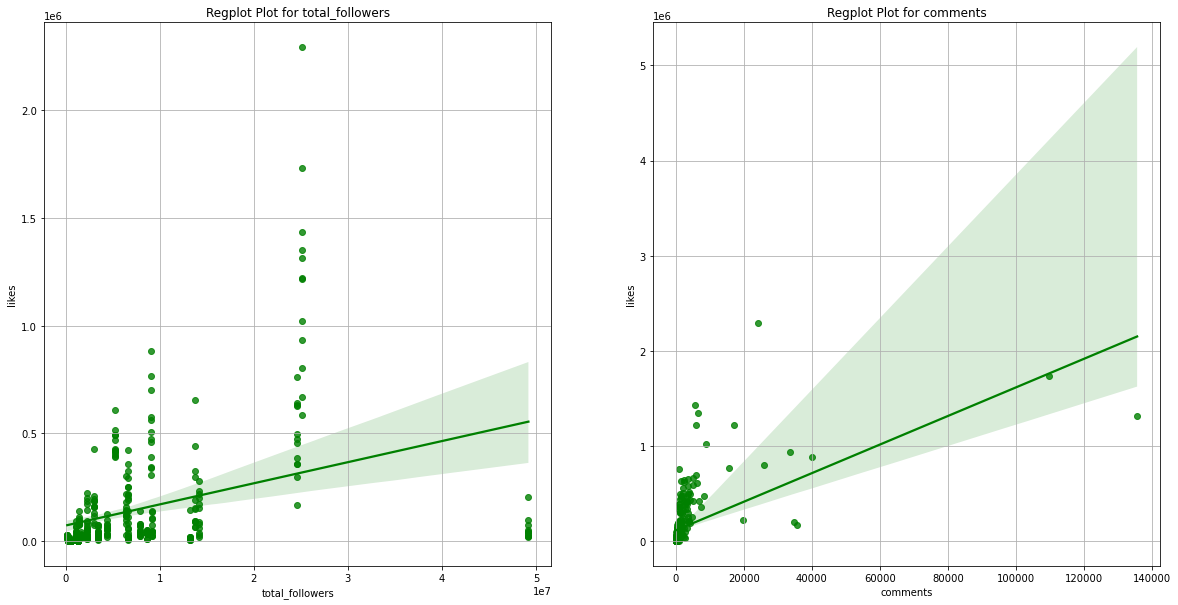

In [16]:
PlotDataGiveConclusion2(['total_followers', 'comments'])

In [17]:
# develop a prediction model
# in the given data set we can have 2 features
# the NUmber of comments and time since Posted and our 
# target is number of likes.
featureVector = np.array(user_df[['total_followers', 'comments']], dtype = 'float32')
targets = np.array(user_df['likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

targets = targets/maxValLikes


Max value of target is 2292809.0


In [18]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)



In [19]:
# Fit the model 
# Gradeint Boosting Regressor
# Gradient Boosting algorithm is used to generate an ensemble model by combining 
# the weak learners or weak predictive models. 
# Gradient boosting algorithm can be used to train models for both regression and classification problem. 
# Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xTrain, yTrain)


GradientBoostingRegressor()

In [21]:
# The model accuracy can be measured in terms of coefficient of determination, 
# R2 (R-squared) or mean squared error (MSE). 


print("Train Model Accuracy: %.3f" % model.score(xTrain, yTrain))
print("Model Accuracy: %.3f" % model.score(xTest, yTest))

Train Model Accuracy: 0.981
Model Accuracy: 0.898


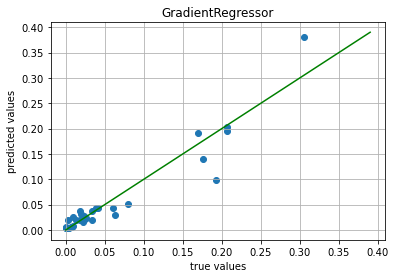

In [22]:
# doing Some Benchmarks
predictions = model.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [ ]:
user_df.describe()

In [ ]:
user_df.head()

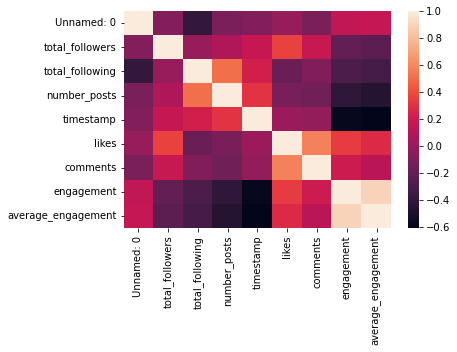

In [23]:
sb.heatmap(user_df.corr())